#Procesamiento de imágenes satelitales meteorológicas con Python 2022.
### Sergio Masuelli
##Practico 3.

Objetivos:

  a. Realizar procesamientos básicos a una imagen satelital y extraer información elemental.

  b. Realizar una clasificación simple a la imagen.

Las imágenes de Landsat 5 que vamos a utilizar en este notebook se encuentran en una carpeta de Google Drive a la cual se accede mediante el siguiente link:

https://drive.google.com/drive/folders/1YEsSQrcLkyxDT7ewYOB3ieq6TyUVVICA?usp=sharing

Al hacer click en el link anterior (teniendo su cuenta de Google logueada), la carpeta LandsaTM_229_82 es agregada a la sección "Compartido conmigo" de su Drive personal. Hacer click entonces sobre la carpeta, presionar shift + z, seleccionar Mi unidad (notar que ya aparece seleccionada en color verde) y presionar el botón Añadir. Una vez hecho lo anterior, debería ver la carpeta LandsaTM_229_82 en su unidad principal de Drive.

Para crear el array es necesario obtener el dato de filas y columnas del archivo header.dat presente en el directorio. Para ello abrir dicho archivo con un editor cualquiera y leer los valores de los campos: **LINES PER IMAGE** y **PIXELS PER LINE**

### Proceso 1:

Levante las bandas de la imagen LandsaTM 229-82 y cárguelas en un array de numpy.




In [25]:
#***********************
# Solución 1
#***********************
import os
import numpy as np
import matplotlib.pyplot as plt  

dir_img = 'C:/Users/marti/Desktop/Procesamiento Imagenes Satelitales 2022/guia3/' #modificar esta linea
os.chdir(dir_img)

nfil = 8350
ncol = 9279
banda="123457" # Nombre de las bandas disponibles
nbands = len(banda)

img0 = np.zeros([nfil, ncol, nbands] ,dtype=np.uint8) 

# Carga de las bandas
for k in range(0,nbands):
  aux0 = open(dir_img + "BAND" + banda[k] + ".dat", 'rb')
  aux1 = np.fromfile(aux0, dtype=np.uint8)
  img0[: ,: , k] = aux1.reshape(nfil, ncol)
  aux0.close()


In [26]:
# # Use para resolver una duda:
# a = open(dir_img + "BAND" + "1" + ".dat", 'rb')
# b = np.fromfile(a, dtype=np.uint8)
# b.reshape(nfil, ncol)
# len(b)
# c = np.ndarray.flatten(b)
# len(c)
# # flatten_x = np.concatenate(x)

In [27]:
img0.shape

(8350, 9279, 6)

In [28]:
img0[:,:,0].max()

255

### Proceso 2: Elegir una banda (por ejemplo banda 1) y despliéguela. Identifique visualmente en la misma las ciudades de Córdoba y Carlos Paz; elija las coordenadas de las esquinas inferior izquierda y superior derecha de modo que en un recorte de 1000x1000 contenga a ambas ciudades.

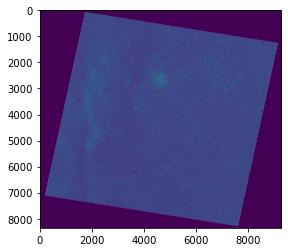

In [29]:
plt.imshow(img0[:,:,0])

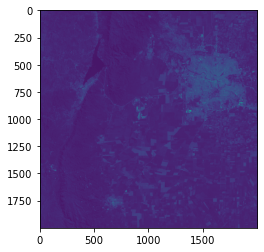

In [30]:
#***********************
# Solución 2
#***********************
 
lfil = 2000
lcol = 2000

#Desplegar una banda e identificar las zonas de interes
#(Desplegando recortes se facilita esta tarea)
plt.imshow(img0[:,:,0])
# Busco primera fila y primera columna, recorte 2000 por 2000
# Cordoba y carlos paz
plt.imshow(img0[2000:4000,3000:5000,0])

# Cordoba entre filas 2500 y 3200
# Carlos paz 

# plt.imshow(img0[:lfil,:lcol,0])

fil0 = 2000 #coordenada de la primera fila 
col0 = 3000 #coordenada de la primera columna

### Proceso 3: Aplique el recorte y visualice

Elija 4 ternas de bandas y visualice. Recuerde que el orden es RGB para los canales al desplegar.


La banda 0 es la azul

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


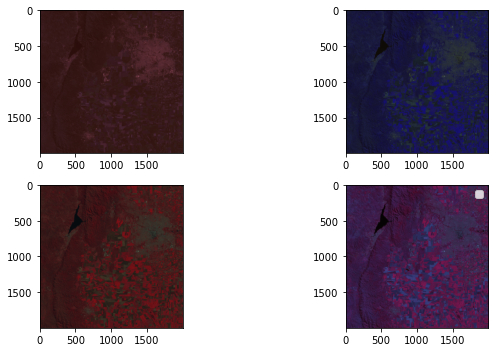

In [31]:
#--------------------------
# Solución 3
#--------------------------

rec = img0[fil0: fil0 + lfil, col0: col0 + lcol, :]
# plt.imshow(rec[:,:,0], "gray")

# Dibujar 4 figuras con subplot de ternas de bandas distintas combinaciones.
plt.figure(figsize=(10,5))

plt.subplot(2,2,1)
plt.imshow(rec[:,:,0:3], "gray")

plt.subplot(2,2,2)
plt.imshow(rec[:,:,[1,2,3]], "gray")

plt.subplot(2,2,3)
plt.imshow(rec[:,:,[3,2,1]], "gray")

plt.subplot(2,2,4)
plt.imshow(rec[:,:,[3,5,4]], "gray")

plt.tight_layout()
plt.legend()
plt.show()

### Proceso 4:
 Obtenga los histograma de cada banda y grafı́quelos. ¿Cuántos modos identifica en cada uno?


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


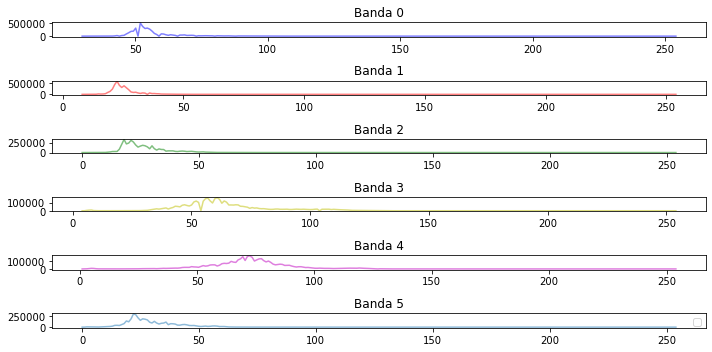

In [32]:
#***********************
# Solución 4
#***********************
# Trabajamos sobre la imagen recortada
band0 = rec[:,:,0]
band1 = rec[:,:,1]
band2 = rec[:,:,2]
band3 = rec[:,:,3]
band4 = rec[:,:,4]
band5 = rec[:,:,5]

frec0,val0=np.histogram(band0, bins=256)
frec1,val1=np.histogram(band1, bins=256)
frec2,val2=np.histogram(band2, bins=256)
frec3,val3=np.histogram(band3, bins=256)
frec4,val4=np.histogram(band4, bins=256)
frec5,val5=np.histogram(band5, bins=256)

plt.figure(figsize=(10,5))
plt.subplot(6,1,1)
plt.title('Banda 0')
plt.plot(val0[:-1],frec0, alpha=0.5,color="b")

plt.subplot(6,1,2)
plt.title('Banda 1')
plt.plot(val1[:-1],frec1, alpha=0.5,color="r")

plt.subplot(6,1,3)
plt.title('Banda 2')
plt.plot(val2[:-1],frec2, alpha=0.5,color="g")

plt.subplot(6,1,4)
plt.title('Banda 3')
plt.plot(val3[:-1],frec3, alpha=0.5,color="y")

plt.subplot(6,1,5)
plt.title('Banda 4')
plt.plot(val4[:-1],frec4, alpha=0.5,color="m")

plt.subplot(6,1,6)
plt.title('Banda 5')
plt.plot(val5[:-1],frec5, alpha=0.5)



plt.tight_layout()
plt.legend()
plt.show()

### Proceso 5: Realce de la imagen al 2 %

    a. Haga una función que haga un realce del "P" porciento
    b. Aplı́quelo a cada banda
    c. Grafique cada histograma y compare con su correspondiente luego de  aplicar el realce. ¿Han cambiado los picos?

*Nota*: un realce al **p** porciento es un realce lineal donde los valores por debajo del acumulado al **p%** se asigan al valor 0 y los valores por encima de **(100 - p) %** se asignan a 1.


Realce al 2% elimna le 2% minimo y el 2% maximo

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


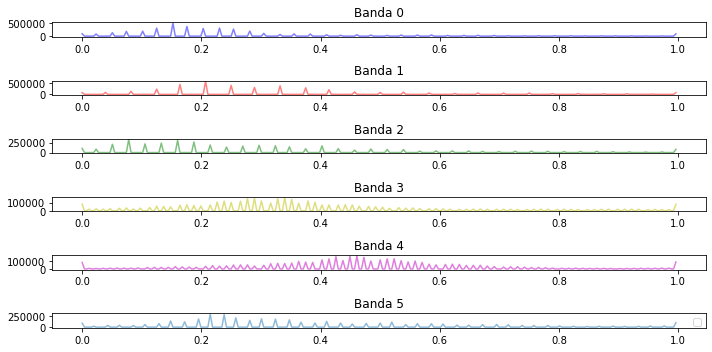

In [33]:
#***********************
# Solución 5.a
#***********************

def realce_p(vec, p):
    '''
    input:
    vec = vector a realzar linealmente
    p = porcentaje para reescalar
    '''
    vecs=np.ndarray.flatten(vec) # Lo pongo en una dimension luego le hago reshape
    aux=np.ndarray.flatten(vec) # Lo pongo en una dimension luego le hago reshape
    aux2 = np.sort(aux) #ordena de mayor a menor
    imin = int(len(vecs) * (p / 100)) # Esto me da la posicion minima del valor de corte.
    imax = int(len(vecs) * ((100 - p) / 100)) # Me da la posicion maxima del valor de corte.
    vmin = float(aux2[imin]) # Obtengo el valor minimo # Le pongo float para que se ejecute todo junto 
    vmax = aux2[imax] # Obtengo el valor maximo
#     print(aux2.dtype, vecs.dtype, vmin.dtype)
    rvec = (vecs - vmin) / (vmax-vmin)
    rvec[rvec < 0] = 0
    rvec[rvec > 1] = 1
    rvec2 = rvec.reshape(2000, 2000)
    return rvec2

# #***********************
# # Solución 5.b
# #***********************
rvec0 = realce_p(rec[:,:,0],2)
rvec1 = realce_p(rec[:,:,1],2)
rvec2 = realce_p(rec[:,:,2],2)
rvec3 = realce_p(rec[:,:,3],2)
rvec4 = realce_p(rec[:,:,4],2)
rvec5 = realce_p(rec[:,:,5],2)


# #***********************
# # Solución 5.c
# #***********************
frec0,val0=np.histogram(rvec0, bins=256)
frec1,val1=np.histogram(rvec1, bins=256)
frec2,val2=np.histogram(rvec2, bins=256)
frec3,val3=np.histogram(rvec3, bins=256)
frec4,val4=np.histogram(rvec4, bins=256)
frec5,val5=np.histogram(rvec5, bins=256)

plt.figure(figsize=(10,5))
plt.subplot(6,1,1)
plt.title('Banda 0')
plt.plot(val0[:-1],frec0, alpha=0.5,color="b")

plt.subplot(6,1,2)
plt.title('Banda 1')
plt.plot(val1[:-1],frec1, alpha=0.5,color="r")

plt.subplot(6,1,3)
plt.title('Banda 2')
plt.plot(val2[:-1],frec2, alpha=0.5,color="g")

plt.subplot(6,1,4)
plt.title('Banda 3')
plt.plot(val3[:-1],frec3, alpha=0.5,color="y")

plt.subplot(6,1,5)
plt.title('Banda 4')
plt.plot(val4[:-1],frec4, alpha=0.5,color="m")

plt.subplot(6,1,6)
plt.title('Banda 5')
plt.plot(val5[:-1],frec5, alpha=0.5)



plt.tight_layout()
plt.legend()
plt.show()



En funcion de esto de abajo temrinar funcion realce

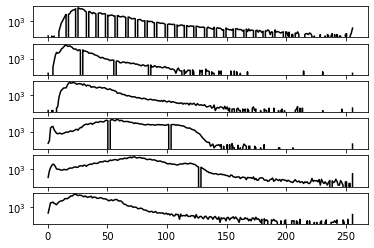

In [34]:
#***********************
# Solución 4
#***********************

nval = 256

val = np.arange(nval) + .5
frec = np.zeros([nval, nbands])

for k in range(nbands):
  frec[:, k], _ = np.histogram(rec[:, : , k], bins = nval)
  plt.subplot(6, 1, k + 1)
  plt.semilogy(val, frec[:, k], 'k')


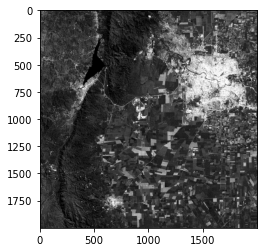

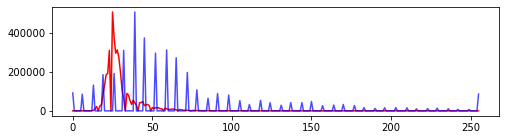

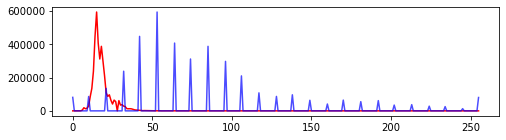

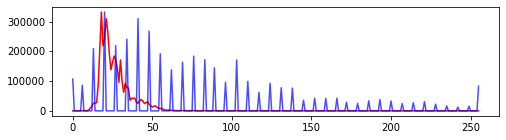

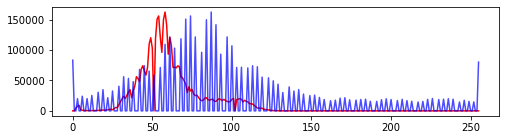

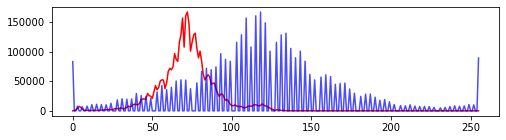

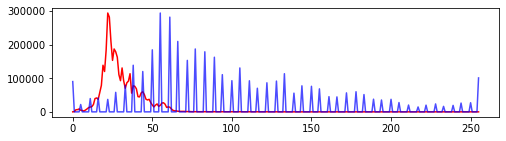

In [35]:
#***********************
# Solución 5.a
#***********************

def realce_p(imag, p):
  '''
  input:
    imag : imagen a realzar linealmente
    p : porcentaje para reescalar
  '''
  aux = np.sort(imag.flatten()) #ordena de mayor a menor
  imin = int(len(aux) * p / 100)
  imax = int(len(aux) * (100 - p) / 100)
  vmin = float(aux[imin]) # para no tener problemas con uint8
  vmax = aux[imax]
  rimag = (imag - vmin) / (vmax - vmin)
  rimag[rimag < 0] = 0  
  rimag[rimag > 1] = 1
  return rimag

#***********************
# Solución 5.b
#***********************

R_rec = np.zeros(rec.shape)
for k in range(nbands):
  R_rec[:, : ,k] = realce_p(rec[:, : ,k], 2)

plt.imshow(R_rec[:, : ,0], 'gray')


#***********************
# Solución 5.c
#***********************

Rval = frec / nval
Rfrec = np.zeros([nval, nbands])

#plt.figure(figsize = (12,3))
for k in range(nbands):
  plt.figure(figsize = (8,2))
  Rfrec[:, k], _ = np.histogram(R_rec[:, : , k], bins = nval)
  plt.plot(frec[:, k], 'r')
  plt.plot(Rfrec[:, k], 'b', alpha = 0.7)




In [36]:
# # Ayuda para realizar la funcion:
# vec=np.ndarray.flatten(rec[:,:,0]) # Lo pongo en una dimension luego le hago reshape
# aux=np.ndarray.flatten(rec[:,:,0]) # Lo pongo en una dimension luego le hago reshape
# aux2 = np.sort(aux) #ordena de mayor a menor
# imin = int(len(vec) * (2 / 100)) # Esto me da la posicion minima del valor de corte.
# imax = int(len(vec) * ((100 - 2) / 100)) # Me da la posicion maxima del valor de corte.
# vmin = aux2[imin] # Obtengo el valor minimo 
# vmax = aux2[imax] # Obtengo el valor maximo
# rvec = (vec - vmin) / (vmax-vmin)
# rvec[rvec < 0] = 0
# rvec[rvec > 1] = 1
# # len(vec)
# # len(rvec)
# vec.reshape(2000, 2000)

### Proceso 6) Despliegue las imágenes en colores para distintas ternas de bandas y observe cuál de ellas produce una mejor separación entre coberturas (agua, urbano, cultivo, monte)


In [37]:
# Vuelvo a armar multidimensional array con los array realzados
real = np.zeros([2000, 2000, 6]) 
real[: ,: , 0] = rvec0
real[: ,: , 1] = rvec1
real[: ,: , 2] = rvec2
real[: ,: , 3] = rvec3
real[: ,: , 4] = rvec4
real[: ,: , 5] = rvec5
real.shape

(2000, 2000, 6)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


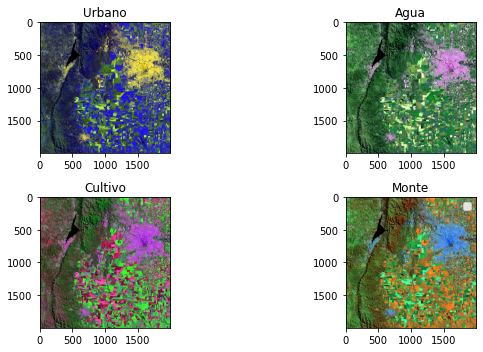

In [38]:
#--------------------------
# Solución 6.
#--------------------------

rec = img0[fil0: fil0 + lfil, col0: col0 + lcol, :]
# plt.imshow(rec[:,:,0], "gray")

# Dibujar 4 figuras con subplot de ternas de bandas distintas combinaciones.
plt.figure(figsize=(10,5))

plt.subplot(2,2,1)
plt.title('Urbano')
plt.imshow(real[:,:,[3,2,4]], "gray")
plt.imshow(real[:,:,[0,2,3]], "gray")


plt.subplot(2,2,2)
plt.title('Agua')
plt.imshow(real[:,:,[2,4,1]], "gray")

plt.subplot(2,2,3)
plt.title('Cultivo')
plt.imshow(real[:,:,[5,3,1]], "gray")

plt.subplot(2,2,4)
plt.title('Monte')
plt.imshow(real[:,:,[3,4,0]], "gray")

plt.tight_layout()
plt.legend()
plt.show()


No se porque no puedo plotear imagen realzada a traves de la combinacion de bandas, por eso continue con imagen no realzada y cuando solucione continuo con realzada. 

In [39]:
# plt.imshow(real[:,:,[0,1,2]],vmax=1,vmin=0)

In [40]:
# min(real[:,:,0])
# rvec5.max()
# rvec5.min()

### Proceso 7) Desplegando pequeños recortes determinar las esquinas que delimitan un rectángulo homogéneo de esas coberturas y guardarlas.


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


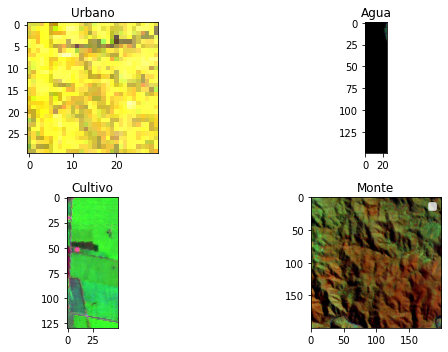

In [41]:
#***********************
# Solución 7
#***********************
# Buscar primer fila y primer columna que contenga y hago recorte
rec = img0[fil0: fil0 + lfil, col0: col0 + lcol, :]
# plt.imshow(rec[:,:,0], "gray")

# Dibujar 4 figuras con subplot de ternas de bandas distintas combinaciones.
plt.figure(figsize=(10,5))

plt.subplot(2,2,1)
plt.title('Urbano')
# plt.imshow(rec[:,:,[3,2,4]], "gray")
plt.imshow(real[520:550,1620:1650,[0,2,3]], "gray")


plt.subplot(2,2,2)
plt.title('Agua')
plt.imshow(real[400:550,500:525,[2,4,1]], "gray")

plt.subplot(2,2,3)
plt.title('Cultivo')
plt.imshow(real[1400:1530,1500:1550,[5,3,1]], "gray")

plt.subplot(2,2,4)
plt.title('Monte')
plt.imshow(real[200:400,700:900,[3,4,0]], "gray")

plt.tight_layout()
plt.legend()
plt.show()


### Proceso 8: Obtener los histogramas de los rectángulos obtenidos en el punto anterior y compáre los con los de la imagen de 1000x1000. Piense que coberturas tienen mayores chances de poder separarse.


In [42]:
print(np.linspace(start=0, stop=1, num=20))
print(min(val0))
print(max(val0))

[0.         0.05263158 0.10526316 0.15789474 0.21052632 0.26315789
 0.31578947 0.36842105 0.42105263 0.47368421 0.52631579 0.57894737
 0.63157895 0.68421053 0.73684211 0.78947368 0.84210526 0.89473684
 0.94736842 1.        ]
0.0
1.0


## Urbano

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


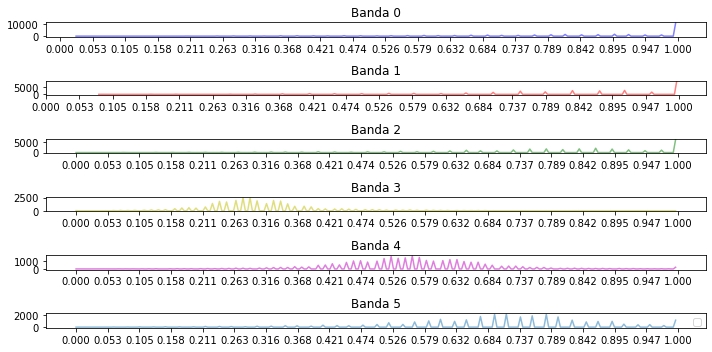

In [43]:
#***********************
# Solución 8
#***********************
urbano = real[450:600,1600:1800,:]

# Trabajamos sobre la imagen recortada
band0 = urbano[:,:,0]
band1 = urbano[:,:,1]
band2 = urbano[:,:,2]
band3 = urbano[:,:,3]
band4 = urbano[:,:,4]
band5 = urbano[:,:,5]

frec0,val0=np.histogram(band0, bins=256)
frec1,val1=np.histogram(band1, bins=256)
frec2,val2=np.histogram(band2, bins=256)
frec3,val3=np.histogram(band3, bins=256)
frec4,val4=np.histogram(band4, bins=256)
frec5,val5=np.histogram(band5, bins=256)

plt.figure(figsize=(10,5))

plt.subplot(6,1,1)
plt.title('Banda 0')
plt.plot(val0[:-1],frec0, alpha=0.5,color="b")
plt.xticks(np.linspace(start=0, stop=1, num=20))


plt.subplot(6,1,2)
plt.title('Banda 1')
plt.plot(val1[:-1],frec1, alpha=0.5,color="r")
plt.xticks(np.linspace(start=0, stop=1, num=20))


plt.subplot(6,1,3)
plt.title('Banda 2')
plt.plot(val2[:-1],frec2, alpha=0.5,color="g")
plt.xticks(np.linspace(start=0, stop=1, num=20))


plt.subplot(6,1,4)
plt.title('Banda 3')
plt.plot(val3[:-1],frec3, alpha=0.5,color="y")
plt.xticks(np.linspace(start=0, stop=1, num=20))


plt.subplot(6,1,5)
plt.title('Banda 4')
plt.plot(val4[:-1],frec4, alpha=0.5,color="m")
plt.xticks(np.linspace(start=0, stop=1, num=20))


plt.subplot(6,1,6)
plt.title('Banda 5')
plt.plot(val5[:-1],frec5, alpha=0.5)
plt.xticks(np.linspace(start=0, stop=1, num=20))


plt.tight_layout()
plt.legend()
plt.show()

## Agua

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


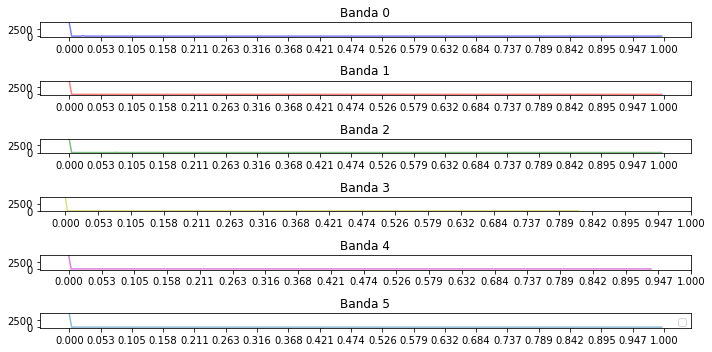

In [44]:
agua =real[400:600,500:525,:]
# Trabajamos sobre la imagen recortada
band0 = agua[:,:,0]
band1 = agua[:,:,1]
band2 = agua[:,:,2]
band3 = agua[:,:,3]
band4 = agua[:,:,4]
band5 = agua[:,:,5]

frec0,val0=np.histogram(band0, bins=256)
frec1,val1=np.histogram(band1, bins=256)
frec2,val2=np.histogram(band2, bins=256)
frec3,val3=np.histogram(band3, bins=256)
frec4,val4=np.histogram(band4, bins=256)
frec5,val5=np.histogram(band5, bins=256)

plt.figure(figsize=(10,5))

plt.subplot(6,1,1)
plt.title('Banda 0')
plt.plot(val0[:-1],frec0, alpha=0.5,color="b")
plt.xticks(np.linspace(start=0, stop=1, num=20))


plt.subplot(6,1,2)
plt.title('Banda 1')
plt.plot(val1[:-1],frec1, alpha=0.5,color="r")
plt.xticks(np.linspace(start=0, stop=1, num=20))


plt.subplot(6,1,3)
plt.title('Banda 2')
plt.plot(val2[:-1],frec2, alpha=0.5,color="g")
plt.xticks(np.linspace(start=0, stop=1, num=20))


plt.subplot(6,1,4)
plt.title('Banda 3')
plt.plot(val3[:-1],frec3, alpha=0.5,color="y")
plt.xticks(np.linspace(start=0, stop=1, num=20))


plt.subplot(6,1,5)
plt.title('Banda 4')
plt.plot(val4[:-1],frec4, alpha=0.5,color="m")
plt.xticks(np.linspace(start=0, stop=1, num=20))


plt.subplot(6,1,6)
plt.title('Banda 5')
plt.plot(val5[:-1],frec5, alpha=0.5)
plt.xticks(np.linspace(start=0, stop=1, num=20))


plt.tight_layout()
plt.legend()
plt.show()

## Cultivo

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


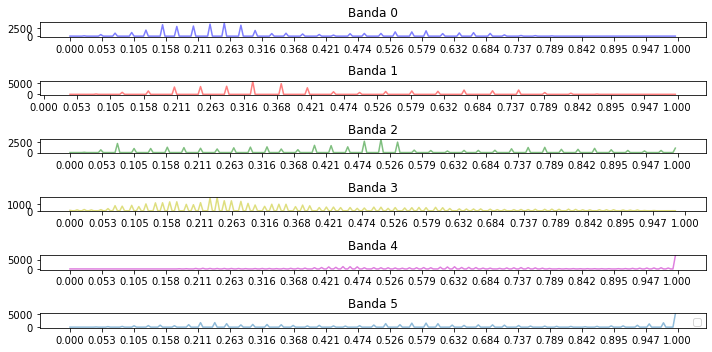

In [45]:
cultivo =real[1200:1300,800:1200,:]
# Trabajamos sobre la imagen recortada
band0 = cultivo[:,:,0]
band1 = cultivo[:,:,1]
band2 = cultivo[:,:,2]
band3 = cultivo[:,:,3]
band4 = cultivo[:,:,4]
band5 = cultivo[:,:,5]

frec0,val0=np.histogram(band0, bins=256)
frec1,val1=np.histogram(band1, bins=256)
frec2,val2=np.histogram(band2, bins=256)
frec3,val3=np.histogram(band3, bins=256)
frec4,val4=np.histogram(band4, bins=256)
frec5,val5=np.histogram(band5, bins=256)

plt.figure(figsize=(10,5))

plt.subplot(6,1,1)
plt.title('Banda 0')
plt.plot(val0[:-1],frec0, alpha=0.5,color="b")
plt.xticks(np.linspace(start=0, stop=1, num=20))


plt.subplot(6,1,2)
plt.title('Banda 1')
plt.plot(val1[:-1],frec1, alpha=0.5,color="r")
plt.xticks(np.linspace(start=0, stop=1, num=20))


plt.subplot(6,1,3)
plt.title('Banda 2')
plt.plot(val2[:-1],frec2, alpha=0.5,color="g")
plt.xticks(np.linspace(start=0, stop=1, num=20))


plt.subplot(6,1,4)
plt.title('Banda 3')
plt.plot(val3[:-1],frec3, alpha=0.5,color="y")
plt.xticks(np.linspace(start=0, stop=1, num=20))


plt.subplot(6,1,5)
plt.title('Banda 4')
plt.plot(val4[:-1],frec4, alpha=0.5,color="m")
plt.xticks(np.linspace(start=0, stop=1, num=20))


plt.subplot(6,1,6)
plt.title('Banda 5')
plt.plot(val5[:-1],frec5, alpha=0.5)
plt.xticks(np.linspace(start=0, stop=1, num=20))


plt.tight_layout()
plt.legend()
plt.show()  

# Monte

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


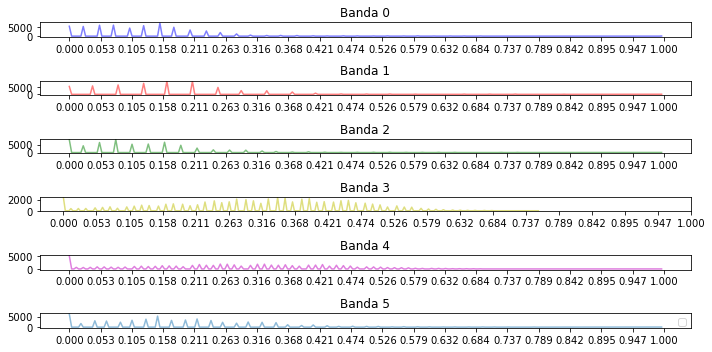

In [46]:
monte =real[200:400,700:1000,:]
# Trabajamos sobre la imagen recortada
band0 = monte[:,:,0]
band1 = monte[:,:,1]
band2 = monte[:,:,2]
band3 = monte[:,:,3]
band4 = monte[:,:,4]
band5 = monte[:,:,5]

frec0,val0=np.histogram(band0, bins=256)
frec1,val1=np.histogram(band1, bins=256)
frec2,val2=np.histogram(band2, bins=256)
frec3,val3=np.histogram(band3, bins=256)
frec4,val4=np.histogram(band4, bins=256)
frec5,val5=np.histogram(band5, bins=256)

plt.figure(figsize=(10,5))

plt.subplot(6,1,1)
plt.title('Banda 0')
plt.plot(val0[:-1],frec0, alpha=0.5,color="b")
plt.xticks(np.linspace(start=0, stop=1, num=20))


plt.subplot(6,1,2)
plt.title('Banda 1')
plt.plot(val1[:-1],frec1, alpha=0.5,color="r")
plt.xticks(np.linspace(start=0, stop=1, num=20))


plt.subplot(6,1,3)
plt.title('Banda 2')
plt.plot(val2[:-1],frec2, alpha=0.5,color="g")
plt.xticks(np.linspace(start=0, stop=1, num=20))


plt.subplot(6,1,4)
plt.title('Banda 3')
plt.plot(val3[:-1],frec3, alpha=0.5,color="y")
plt.xticks(np.linspace(start=0, stop=1, num=20))


plt.subplot(6,1,5)
plt.title('Banda 4')
plt.plot(val4[:-1],frec4, alpha=0.5,color="m")
plt.xticks(np.linspace(start=0, stop=1, num=20))


plt.subplot(6,1,6)
plt.title('Banda 5')
plt.plot(val5[:-1],frec5, alpha=0.5)
plt.xticks(np.linspace(start=0, stop=1, num=20))


plt.tight_layout()
plt.legend()
plt.show()

Comparando los histogramas podemos concluir que lo mas facil de separar es en primer lugar el agua que posee valores bajos de frecuencia para todas las bandas, en segundo lugar lo urbano, luego el cultivo y el monte que poseen patrones muy similares de frecuencias pero se logran diferenciar gracais a la banda 3,4 y 5.

### Proceso 9: Hacer los filtros para cada cobertura sobre las bandas IR:

    a. Para cada banda seleccionada elija un rango de valores que sea tı́pico para cada una de la coberturas.
    b. Arme un árbol de decisión para clasificar los pixeles según cada cobertura. Arme uno usando if para entender la lógica, pero observe que es muy lento. Trate luego de implementar uno con máscaras teniendo en cuenta el orden de aplicación para simular la jerarquı́a de los if.
    c. Elija 4 colores muy contrastantes para asignarlos a las coberturas y pinte la imagen recortada.
    d. A los filtros anteriores de 3 bandas IR añada otra decisión más usando una banda visible para separar entre ciudad y monte.
    e. Aplique el mismo realce a la imagen completa que aplicó a la imagen recortada y repita el punto anterior para la imagen completa.

* Como ploteo la imagen a partir del resultado.
* Como hago con mascara esta mal?. Lo hago a partir del if, como hago para poner mas de una condicion alli.
* como asigno un color a una cobertura y ploteo. 
* Que tipo de estructura de dato tengo que armar para añadir otra banda mas como dice en d.

In [47]:
# cero = real[:,:,0]
# uno = real[:,:,1]
# dos = real[:,:,2]
# tres = real[:,:,3]
# cuatro = real[:,:,4]
# cinco = real[:,:,5]

# # urbano=[]
# # agua=[]
# # cultivo=[]
# # monte=[]

# imagen=np.empty([2000,2000])

# for i in range(0,real[:,:,0].shape[0]):
#     for j in range(0,real[:,:,0].shape[1]):
#         if ((0.158<tres[i,j]<0.43) and (0.469<cinco[i,j]<0.896)): 
#             imagen[i,j]=0 #urbano
# #             urbano.append([i,j])
#         if ((0<tres[i,j]<=0.05) and (0<cero[i,j]<=0.05)): 
#             imagen[i,j]=1 #agua
# #             agua.append([i,j]) 
#         if ((0.158<uno[i,j]<0.47) and (0.053<cero[i,j]<0.316)): 
#             imagen[i,j]=2 # cultivo
# #             cultivo.append([i,j])
#         if ((0<tres[i,j]<0.579) and (0<cinco[i,j]<0.469) and (0<dos[i,j]<0.316)):
#             imagen[i,j]=3 #monte 
# #             monte.append([i,j])

In [48]:
# plt.imshow(imag_int, cmap="gray")

In [49]:
# urbano_int = imag_int==0
# agua_int = imag_int==1
# cultivo_int = imag_int==2
# monte_int = imag_int==3

In [50]:
# import matplotlib.pyplot as plt
# import numpy as np

# # plt.rcParams["figure.figsize"] = [7.50, 3.50]
# # plt.rcParams["figure.autolayout"] = True

# data1 = np.ma.masked_array(imagen, imagen <= 0)
# data2 = np.ma.masked_array(imagen, np.logical_and(imagen > 0, imagen <= 1))
# data3 = np.ma.masked_array(imagen, np.logical_and(imagen > 1, imagen <= 2))
# data4 = np.ma.masked_array(imagen, np.logical_and(imagen > 2, imagen <= 3))

# fig, ax = plt.subplots()

# img1 = ax.imshow(data1)
# img2 = ax.imshow(data2)
# img3 = ax.imshow(data3)
# img4 = ax.imshow(data4)

# # bar1.set_label('ColorBar 1')
# # bar2.set_label('ColorBar 2')

# plt.show()

In [51]:
# cero = real[:,:,0]
# uno = real[:,:,1]
# dos = real[:,:,2]
# tres = real[:,:,3]
# cuatro = real[:,:,4]
# cinco = real[:,:,5]

# # urbano=[]
# # agua=[]
# # cultivo=[]
# # monte=[]

# imagen=np.zeros([2000,2000,4])

# for i in range(0,real[:,:,0].shape[0]):
#     for j in range(0,real[:,:,0].shape[1]):
#         if ((0.158<tres[i,j]<0.43) and (0.469<cinco[i,j]<0.896)): 
#             imagen[i,j,0]=1 #urbano
# #             urbano.append([i,j])
#         if ((0<tres[i,j]<=0.05) and (0<cero[i,j]<=0.05)): 
#             imagen[i,j,1]=1 #agua
# #             agua.append([i,j]) 
#         if ((0.158<uno[i,j]<0.47) and (0.053<cero[i,j]<0.316)): 
#             imagen[i,j,2]=1 # cultivo
# #             cultivo.append([i,j])
#         if ((0<tres[i,j]<0.579) and (0<cinco[i,j]<0.469) and (0<dos[i,j]<0.316)):
#             imagen[i,j,3]=1 #monte 
# #             monte.append([i,j])

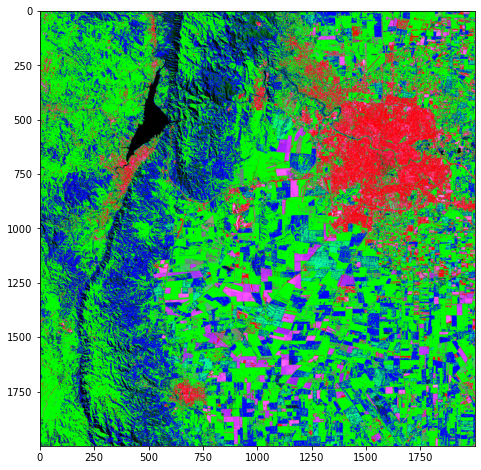

In [52]:
#***********************
# Solución 9.a
#***********************
Clasif = np.copy(real[:, :, 2:5]) #Imagen final temática

# Agua
a_umbral1 = np.zeros(3)
a_umbral2 = np.array([ 0.05, 0.05,0.05])

# Urbano
u_umbral1 = np.array([0,0,0,0.21,0.42,0.57])
u_umbral2 = np.array([0,0,0,0.37,0.68,0.84])

# Cultivo
c_umbral1 = np.array([0.2,0.2,0.42,0.105,0.9,0.9])
c_umbral2 = np.array([0.4,0.45,0.54,0.316,1,1])

# Monte
m_umbral1 = np.array([0.055,0,0.055,0.158,0,0.053])
m_umbral2 = np.array([0.15,0,0.15,0.47,0,0.31])


# #***********************
# # Solución 9.b
# #***********************
# #filtro (árbol de desición implementado mediante productos de filtros)
# i_agua = real[:, :, 3] < a_umbral2[0]


for k in range(0,3):
  i_agua = i_agua * (real[:, :, k+3] < a_umbral2[k])

for k in [3,5]:
  i_urb = (real[:, :, k] > u_umbral1[k]) * (real[:, :, k] < u_umbral2[k])

for k in [0,1]:
  i_cul = (real[:, :, k] > c_umbral1[k]) * (real[:, :, k] < c_umbral2[k])

for k in [0,2]:
  i_mon = (real[:, :, k] > m_umbral1[k]) * (real[:, :, k] < m_umbral2[k])

# #***********************
# # Solución 9.c
# #***********************

Clasif[i_agua, 0] = 0
Clasif[i_agua, 1] = 0
Clasif[i_agua, 2] = 0

Clasif[i_urb, 0] = 1
Clasif[i_urb, 1] = 0
Clasif[i_urb, 2] = 0

Clasif[i_cul, 0] = 0
Clasif[i_cul, 1] = 1
Clasif[i_cul, 2] = 0

Clasif[i_mon, 0] = 0
Clasif[i_mon, 1] = 0
Clasif[i_mon, 2] = 1

plt.figure(figsize = (8,8))
plt.imshow(Clasif)


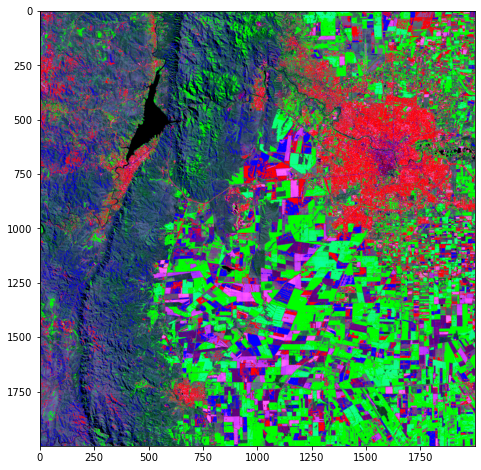

In [53]:
#***********************
# Solución 9.d
#***********************
# d. A los filtros anteriores de 3 bandas IR añada otra decisión más usando una banda visible para separar entre ciudad y monte.
# Se me confunde monte con cultivo.
# Buscar alguna banda para discriminar monte y cultivo. 1 sola banda y añado otra condicion mas para separar mas.
# Pongo una condicion mas que afecte a las dos. Agrego una condicion adicional. 
Clasif = np.copy(real[:, :, 2:5]) #Imagen final temática

# Agua
a_umbral1 = np.zeros(3)
a_umbral2 = np.array([ 0.05, 0.05,0.05])

# Urbano
u_umbral1 = np.array([0,0,0,0.17,0.42,0.57])
u_umbral2 = np.array([0,0,0,0.38,0.68,0.84]) # rojo

# Cultivo
c_umbral1 = np.array([0.2,0.2,0,0.5,0,0])
c_umbral2 = np.array([0.4,0.45,0,0.9,0,0]) # verde

# Monte
m_umbral1 = np.array([0.055,0,0.055,0.1,0,0])
m_umbral2 = np.array([0.15,0,0.15,0.17,0,0]) #azul


# #***********************
# # Solución 9.b
# #***********************
# #filtro (árbol de desición implementado mediante productos de filtros)
# i_agua = real[:, :, 3] < a_umbral2[0]

for k in range(0,3):
  i_agua = i_agua * (real[:, :, k+3] < a_umbral2[k])

for k in [3,5]:
  i_urb = (real[:, :, k] > u_umbral1[k]) * (real[:, :, k] < u_umbral2[k])

for k in [0,1,3]:
  i_cul = (real[:, :, k] > c_umbral1[k]) * (real[:, :, k] < c_umbral2[k])

for k in [0,2,3]:
  i_mon = (real[:, :, k] > m_umbral1[k]) * (real[:, :, k] < m_umbral2[k])


# #***********************
# # Solución 9.c
# #***********************

Clasif[i_agua, 0] = 0
Clasif[i_agua, 1] = 0
Clasif[i_agua, 2] = 0

Clasif[i_urb, 0] = 1
Clasif[i_urb, 1] = 0
Clasif[i_urb, 2] = 0

Clasif[i_cul, 0] = 0
Clasif[i_cul, 1] = 1
Clasif[i_cul, 2] = 0

Clasif[i_mon, 0] = 0
Clasif[i_mon, 1] = 0
Clasif[i_mon, 2] = 1

plt.figure(figsize = (8,8))
plt.imshow(Clasif)

# plt.show()
# plt.imshow(Clasif[1100: 1300, 800:1000, :])
# plt.title('Zoom laguna')

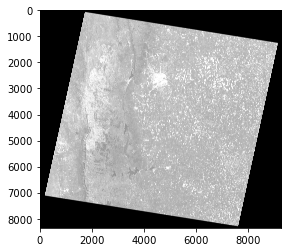

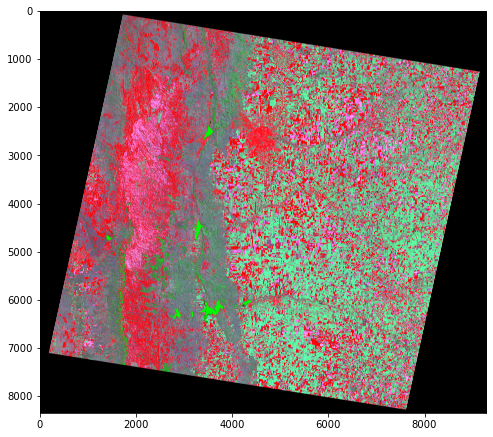

In [54]:
#***********************
# Solución 9.e
#***********************
# e. Aplique el mismo realce a la imagen completa que aplicó a la imagen recortada y repita el punto anterior para la imagen completa.
R_comp = np.zeros(img0.shape)
for k in range(nbands):
    R_comp[:, : ,k] = realce_p(img0[:, : ,k], 2)

plt.imshow(R_comp[:, : ,0], 'gray')


Clasif2 = np.copy(R_comp[:, :, 2:5]) #Imagen final temática

# Agua
a_umbral1 = np.zeros(3)
a_umbral2 = np.array([ 0.05, 0.05,0.05])

# Urbano
u_umbral1 = np.array([0,0,0,0.21,0.42,0.57])
u_umbral2 = np.array([0,0,0,0.37,0.68,0.84])

# Cultivo
c_umbral1 = np.array([0.2,0.2,0.42,0.105,0.9,0.9])
c_umbral2 = np.array([0.4,0.45,0.54,0.316,1,1])

# Monte
m_umbral1 = np.array([0.055,0,0.055,0.158,0,0.053])
m_umbral2 = np.array([0.15,0,0.15,0.47,0,0.31])


# #***********************
# # Solución 9.b
# #***********************
# #filtro (árbol de desición implementado mediante productos de filtros)
i_agua = R_comp[:, :, 3] < a_umbral2[0]
for k in range(0,3):
  i_agua = i_agua * (R_comp[:, :, k+3] < a_umbral2[k])

for k in [3,5]:
  i_urb = (R_comp[:, :, k] > u_umbral1[k]) * (R_comp[:, :, k] < u_umbral2[k])

for k in [0,1]:
  i_cul = (R_comp[:, :, k] > c_umbral1[k]) * (R_comp[:, :, k] < c_umbral2[k])

for k in [0,2]:
  i_mon = (R_comp[:, :, k] > m_umbral1[k]) * (R_comp[:, :, k] < m_umbral2[k])


# #***********************
# # Solución 9.c
# #***********************

Clasif2[i_agua, 0] = 0
Clasif2[i_agua, 1] = 0
Clasif2[i_agua, 2] = 0

Clasif2[i_urb, 0] = 1
Clasif2[i_urb, 1] = 0
Clasif2[i_urb, 2] = 0

Clasif2[i_cul, 0] = 0
Clasif2[i_cul, 1] = 1
Clasif2[i_cul, 2] = 0

Clasif2[i_mon, 0] = 0
Clasif2[i_mon, 1] = 0
Clasif2[i_mon, 2] = 1

plt.figure(figsize = (8,8))
plt.imshow(Clasif2)

